In [131]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
# 페이지 접속 테스트
url = 'https://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_USDKRW&page=1'

html = requests.get(url)

soup = bs(html.text, 'html.parser')
soup

<html lang="ko">
<head>
<title>네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20221107172649/css/finance.css" rel="stylesheet" type="text/css"/>
<script language="javascript">document.domain="naver.com";</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20221107172649/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript"></script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20221107172649/js/lcslog.js" type="text/javascript"></script>
</head>
<body>
<div class="section_exchange section_today">
<h3 class="h_today"><span>일별 환율</span></h3>
<table border="1" class="tbl_exchange today" summary="일별 환율 리스트">
<caption>일별 환율</caption>
<colgroup>
<col width="78"/>
<col width="78"/>
<col width="73"/>
<col width="76"/>
<col width="76"/>
<col width="76

In [57]:
# 환율 가져오기
soup.select('.num')[0].text.replace(',', '')

'1306.00'

In [55]:
# 날짜 가져오기
soup.select('.date')

[<td class="date">2022.07.06</td>,
 <td class="date">2022.07.05</td>,
 <td class="date">2022.07.04</td>,
 <td class="date">2022.07.01</td>,
 <td class="date">2022.06.30</td>,
 <td class="date">2022.06.29</td>,
 <td class="date">2022.06.28</td>,
 <td class="date">2022.06.27</td>,
 <td class="date">2022.06.24</td>,
 <td class="date">2022.06.23</td>]

In [15]:
# 1페이지의 날짜 모두 가져오기
date_lst = []
for i in range(10):
    date_lst.append(soup.select('.date')[i].text)

date_lst

['2022.11.16',
 '2022.11.15',
 '2022.11.14',
 '2022.11.11',
 '2022.11.10',
 '2022.11.09',
 '2022.11.08',
 '2022.11.07',
 '2022.11.04',
 '2022.11.03']

In [58]:
# 1페이지의 환율 모두 가져오기
exchange_lst = []
for i in range(0,19,2):
    exchange_lst.append(soup.select('.num')[i].text.replace(',', ''))

exchange_lst

['1306.00',
 '1311.50',
 '1295.50',
 '1298.00',
 '1301.50',
 '1297.50',
 '1291.00',
 '1285.00',
 '1296.00',
 '1303.50']

In [74]:
# 1~10페이지까지 날짜와 환율 모두 가져오기
date_lst = []
exchange_lst = []

for p in range(1,6):
    url = f'https://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_USDKRW&page={p}'

    html = requests.get(url)

    soup = bs(html.text, 'html.parser')

    for i in range(10):
        date_lst.append(soup.select('.date')[i].text)

    for j in range(0,19,2):
        exchange_lst.append(soup.select('.num')[j].text.replace(',', ''))

date_lst.reverse()
exchange_lst.reverse()

exchange_lst = list(map(float, exchange_lst))

print(date_lst)
print(exchange_lst)

['2022.09.02', '2022.09.05', '2022.09.06', '2022.09.07', '2022.09.08', '2022.09.13', '2022.09.14', '2022.09.15', '2022.09.16', '2022.09.19', '2022.09.20', '2022.09.21', '2022.09.22', '2022.09.23', '2022.09.26', '2022.09.27', '2022.09.28', '2022.09.29', '2022.09.30', '2022.10.04', '2022.10.05', '2022.10.06', '2022.10.07', '2022.10.11', '2022.10.12', '2022.10.13', '2022.10.14', '2022.10.17', '2022.10.18', '2022.10.19', '2022.10.20', '2022.10.21', '2022.10.24', '2022.10.25', '2022.10.26', '2022.10.27', '2022.10.28', '2022.10.31', '2022.11.01', '2022.11.02', '2022.11.03', '2022.11.04', '2022.11.07', '2022.11.08', '2022.11.09', '2022.11.10', '2022.11.11', '2022.11.14', '2022.11.15', '2022.11.16']
[1363.0, 1372.0, 1379.5, 1386.0, 1379.0, 1390.0, 1394.0, 1399.0, 1390.0, 1394.0, 1395.0, 1396.0, 1406.0, 1423.0, 1425.0, 1427.0, 1440.0, 1434.0, 1439.0, 1428.0, 1424.0, 1411.0, 1429.0, 1435.5, 1433.0, 1439.0, 1442.5, 1436.0, 1427.0, 1434.0, 1427.0, 1438.0, 1442.0, 1433.0, 1420.0, 1423.0, 1425.5, 14

In [75]:
# 데이터 프레임 만들기
df = pd.DataFrame({'date' : date_lst, 'exchange' : exchange_lst})
df

,date,exchange
0,2022.09.02,1363.0
1,2022.09.05,1372.0
2,2022.09.06,1379.5
3,2022.09.07,1386.0
4,2022.09.08,1379.0
5,2022.09.13,1390.0
6,2022.09.14,1394.0
7,2022.09.15,1399.0
8,2022.09.16,1390.0
9,2022.09.19,1394.0


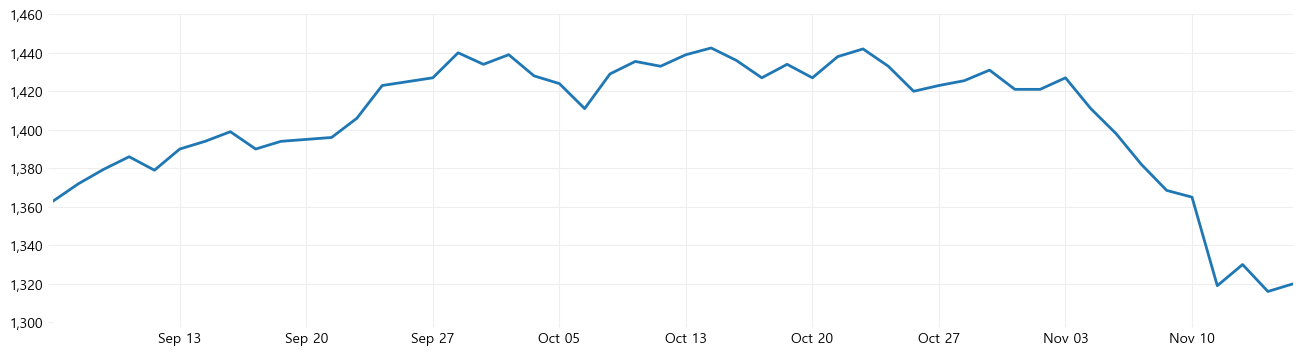

In [148]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (16,4)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2

# 데이터 넣기
plt.plot(df['date'], df['exchange'])

# 축 labeling
grp_date = [df['date'][x] for x in range(5, len(df['date']), 5)]
grp_exchanges = list(plt.gca().get_yticks())
plt.xticks(grp_date, [datetime.strptime(d, '%Y.%m.%d').strftime('%b %d') for d in grp_date])
plt.yticks(grp_exchanges, [f'{e:,.0f}' for e in grp_exchanges])

plt.gca().tick_params(colors='#EEEEEE', labelcolor='black')

# 범위지정
plt.xlim(df['date'].iloc[0], df['date'].iloc[-1])

# 그래프 내에 그리드선 표시하기
plt.grid(True, color='#EEEEEE')

# 테두리 제거
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()